# E - Commerce Production Delivery Prediction

The aim of this project to predict whether the product from an e-commerce company will reach on time or not. This project also analyzes various factors that affect the delivery of the  product as well as studies the customer behaior.

# context

An internatinal e-commerce company basad to descover key insights from their customer database. They want to the most advanced machine learning tachniques to their customer. the company sells electronic product.

# Data Dictionary

VariableThe aim of this project to predict whether the product from an e-commerce company will reach on time or not. This project also analyzes various factors that affect the delivery of the product as well as studies the customer behavior.

### Context
An international e-commerce company based wants to discover key insights from their customer database. They want to use some of the most advanced machine learning techniques to study their customers. The company sells electronic products.

### Data Dictionary
The dataset used for model building contained 10999 observations of 12 variables. The data contains the following information:


| Variable | Description |
| --- | --- |
|ID|ID Number of Customers|
|Warehouse_block|The Company have big Warehouse which is divided into block such as A,B,C,D,E|
|Mode_of_Shipment|The Company Ships the products in multiple way such as Ship, Flight and Road|
|Customer_care_calls|The number of calls made from enquiry for enquiry of the shipment|
|Customer_rating|The company has rated from every customer. 1 is the lowest (Worst), 5 is the highest (Best)|
|Cost_of_the_Product|Cost of the Product in US Dollars|
|Prior_purchases|The Number of Prior Purchase|
|Product_importance|The company has categorized the product in the various parameter such as low, medium, high|
|Gender|Male and Female|
|Discount_offered|Discount offered on that specific product|
|Weight_in_gms|It is the weight in grams|
|Reached.on.Time_Y.N|It is the target variable, where 1 Indicates that the product has NOT reached on time and 0 indicates it has reached on time|


In [1]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading the dataset
df = pd.read_csv(r"C:\Users\PRAMOD\OneDrive\Documents\E_Commerce.csv")
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


# data preprocessing 1

In [3]:
# checking the shape the dataset
df.shape

(10999, 12)

In [4]:
# checking dat type of types of the columns
df.dtypes

ID                      int64
Warehouse_block        object
Mode_of_Shipment       object
Customer_care_calls     int64
Customer_rating         int64
Cost_of_the_Product     int64
Prior_purchases         int64
Product_importance     object
Gender                 object
Discount_offered        int64
Weight_in_gms           int64
Reached.on.Time_Y.N     int64
dtype: object

Dropping column Id because it is an index column

In [5]:
#Drop column
df.drop(['ID'], axis=1, inplace=True)

In [6]:
#checking for null/missing values
df.isnull().sum()

Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [7]:
#checking for duplicate values
df.duplicated().sum()

0

Descrptive Statistics

In [8]:
df.describe()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [9]:
df.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,D,Flight,4,2,177,3,low,F,44,1233,1
1,F,Flight,4,5,216,2,low,M,59,3088,1
2,A,Flight,2,2,183,4,low,M,48,3374,1
3,B,Flight,3,3,176,4,medium,M,10,1177,1
4,C,Flight,2,2,184,3,medium,F,46,2484,1


# Exploratory Data Annalysis

In the exploratory data analysis, I will be looking at the  relationship between the target variable and the other variables. I will also be looking the distribution of the varibles across the dataset, in order to understand the data in a better way

# Customer Gender Distrubution

Text(0.5, 1.0, 'Gender Distribution')

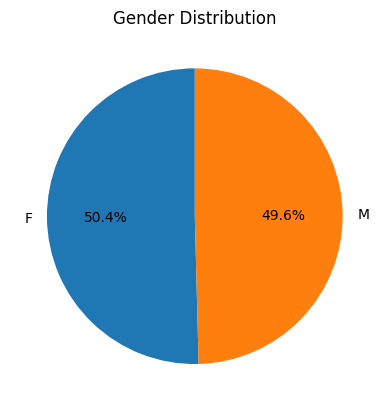

In [10]:
plt.pie(df['Gender'].value_counts(),labels = ['F','M'], autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution')

The dataset has the equal number of both males and female customers, with percentage of 49.6% and 50.4% respectively

# Product preperties

Text(0.5, 1.0, 'Cost of the Product')

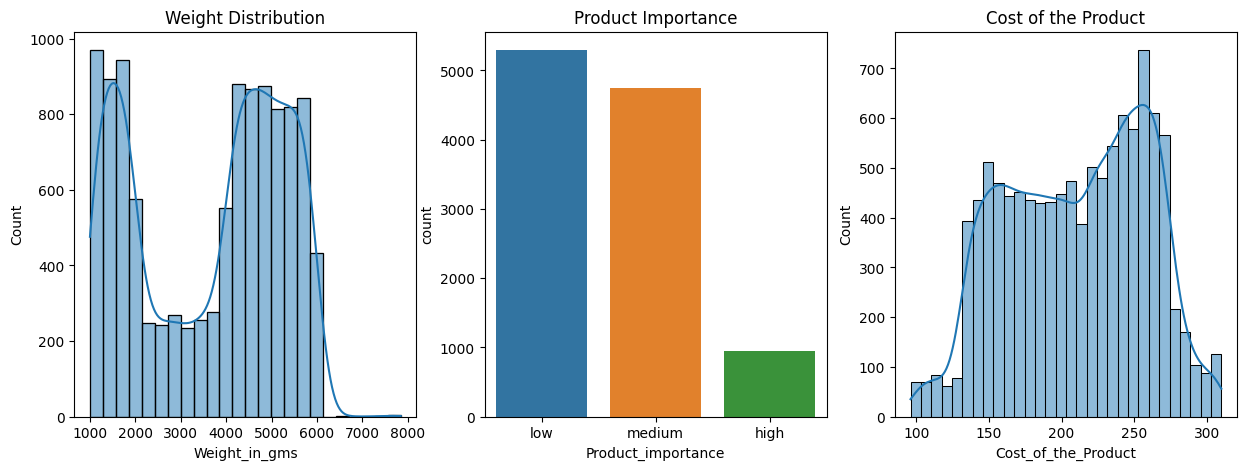

In [11]:
fig, ax = plt.subplots(1,3,figsize=(15,5))
sns.histplot(df['Weight_in_gms'], ax=ax[0], kde=True).set_title('Weight Distribution')
sns.countplot(x = 'Product_importance', data = df, ax=ax[1]).set_title('Product Importance')
sns.histplot(df['Cost_of_the_Product'],kde=True).set_title('Cost of the Product')

These three graphs explian the distribution of the product properties - Weight,Cost and Importance in the dataset. Firstly,looking at the weight distribution,,we can see the products weighing between 1000-2000 grams and 4000-6000 grams are more in number. This means that the company is selling more of the product in these qeight ranges. The second graph is about the product importaance, where majority of the have low or medieum importance.The third graph is about cost of the product. Third graph is about the cost distribution of the products, where tere is increasing distribution between 150-200 and 225-275 dollars.
From this. I conclide that majority of the products are lighter than 6000 grams, have low or medium importance and costs betweem 150-275 dollars.

# Logistics

Text(0.5, 1.0, 'Reached on time')

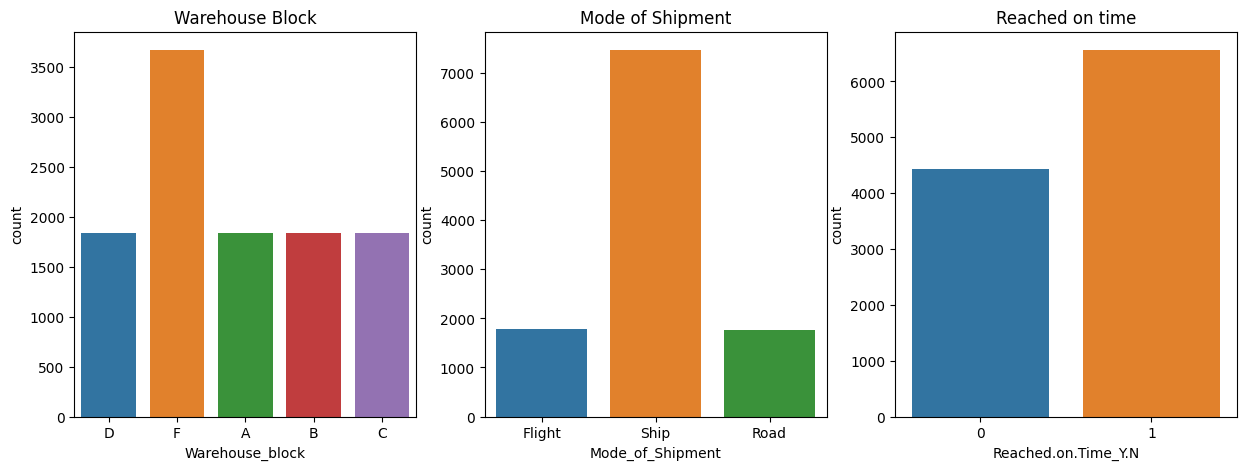

In [12]:
fig, ax = plt.subplots(1,3,figsize=(15,5))
sns.countplot(x = 'Warehouse_block', data = df, ax=ax[0]).set_title('Warehouse Block')
sns.countplot(x = 'Mode_of_Shipment', data = df,ax=ax[1]).set_title('Mode of Shipment')
sns.countplot(x = 'Reached.on.Time_Y.N', data = df,ax=ax[2]).set_title('Reached on time')

The above graphs visualizes the logistics and delivery of the product. In the First graph, we caan see that the number of produccts from werehouse F is most i.e. 3500, whereas rest of the warehouse have nearly equal number of product. where majority of the products are shipped vai ship whereas nearly 2000  products are shipped by flights and road. Third graph is about iss about the timely delivered on time is more than the number of products not deliverd on time.

From all the above graph, I assumed tthat wherehouse F is close to seaport,because warehouse F has the most number of products amd most of the products are shipped vai ship.

# Custmore experience

Text(0.5, 1.0, 'Discount Offered')

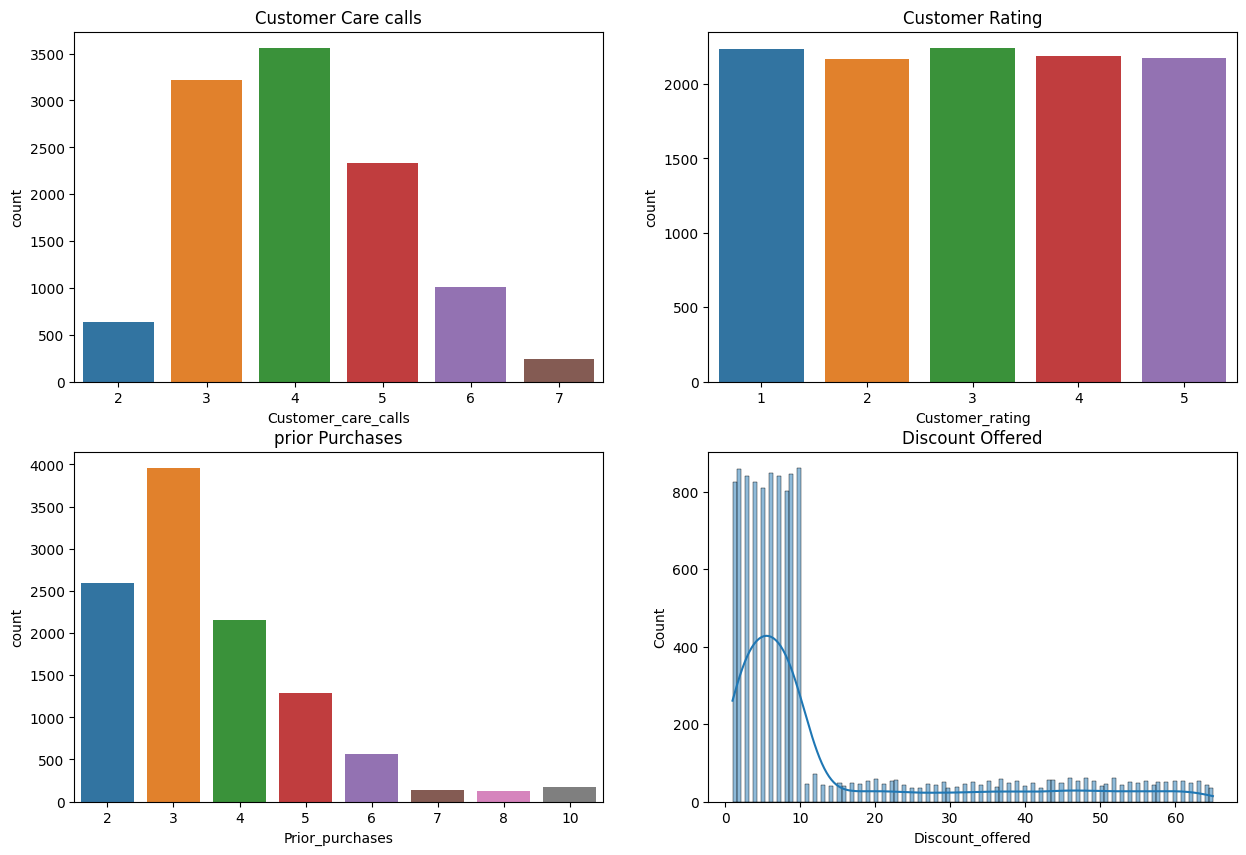

In [13]:
fig, ax =plt.subplots(2,2,figsize=(15,10))
sns.countplot(x = 'Customer_care_calls', data = df, ax=ax[0,0]).set_title('Customer Care calls')
sns.countplot(x = 'Customer_rating', data = df, ax=ax[0,1]).set_title('Customer Rating')
sns.countplot(x = 'Prior_purchases', data = df, ax=ax[1,0]).set_title('prior Purchases')
sns.histplot(x = 'Discount_offered', data = df, ax=ax[1,1], kde = True).set_title('Discount Offered')

The above graphs visualiize the cusstomer experience based on their customer care calls, rating,prior purchases and discount offered. The first graph shows the number of customer care calls done by the customer, where we can see that mejority of customers could be facing the product delivery .In the scond graph ,we can see that the count of customer ratings accross all rating is same, but there are little more count in ratings 1, which means customers are not satisfied with the service.

The third graph is prior purchases done by the customers, where we can see that majority of customers have done 2-3 prior purchases, wich means who are having prior purchases, They are satisfied with the service, and they are bying more products, where we can see that majority of the products have 0-10% dicsount, which means that the company is not offering much discount on the products.

# Customer Gender and Product Delivery

Text(0.5, 1.0, 'Gender vs Reached on Time')

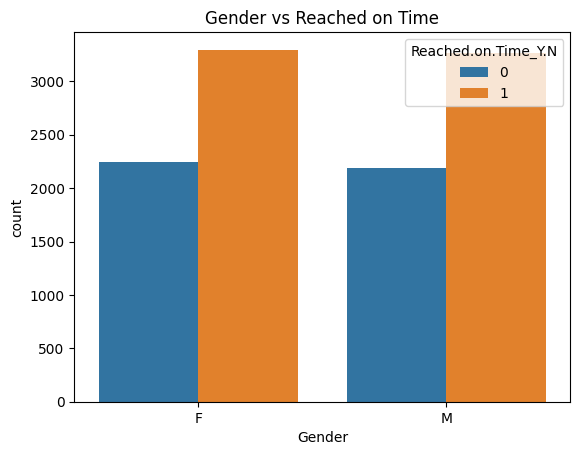

In [14]:
sns.countplot(x = 'Gender', data =df,hue = 'Reached.on.Time_Y.N').set_title('Gender vs Reached on Time')

The number of products timely deliverd for both the genders is same,which means no ralation customercustomer and product delivery.

# Product Properties and Product Delivery

Text(0.5, 1.0, 'Cost of the Product')

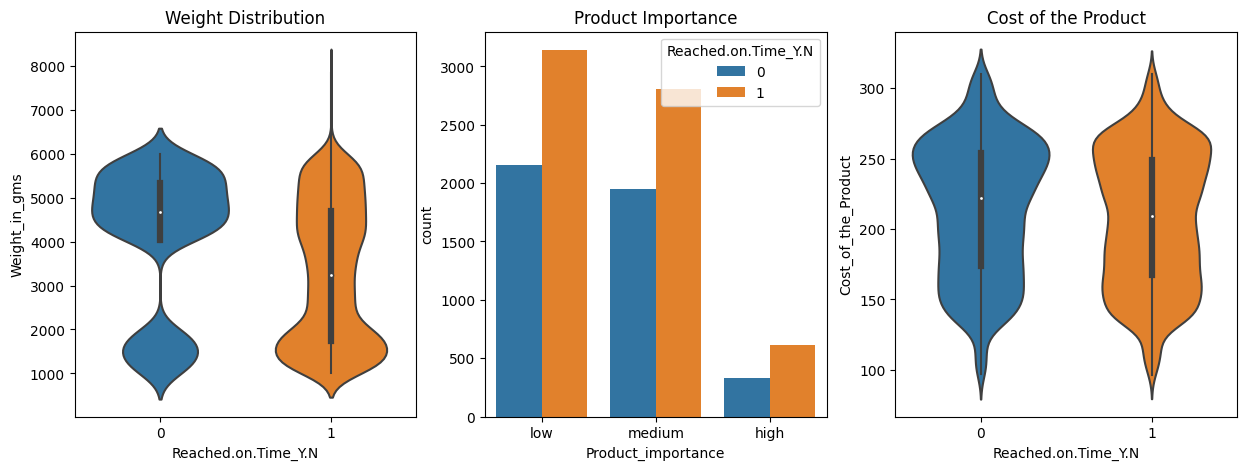

In [15]:
fig, ax = plt.subplots(1,3,figsize=(15,5))
sns.violinplot(y = df['Weight_in_gms'],ax=ax[0],kde=True, x = df['Reached.on.Time_Y.N']).set_title('Weight Distribution')
sns.countplot(x = 'Product_importance', data = df, ax=ax[1], hue = 'Reached.on.Time_Y.N').set_title('Product Importance')
sns.violinplot(y = df['Cost_of_the_Product'], ax=ax[2], kde=True, x = df['Reached.on.Time_Y.N']).set_title('Cost of the Product')

The above plots visualizes the relarionship betwween product properties and product delivery. From the first graph it is quite clear the product weight more than 4500 gramms are not delivered on time, in the addition to that more products that wieght between 2500 - 3500 grams are delivered timely.The second graph is about the product importance and the product delivery, where we can see that there is no major diffrence between the product delivery based the product importance between the product based on the product importance. The third grapg is shows the relationship between the cost of the product and product delivery, where we caan see that products that cost more than 250 have higher count of not delivered on time.

From this conclude that product weight cost has an impact on the product delivery

# Logistic and Product Delivery

Text(0.5, 1.0, 'Mode of Shipment')

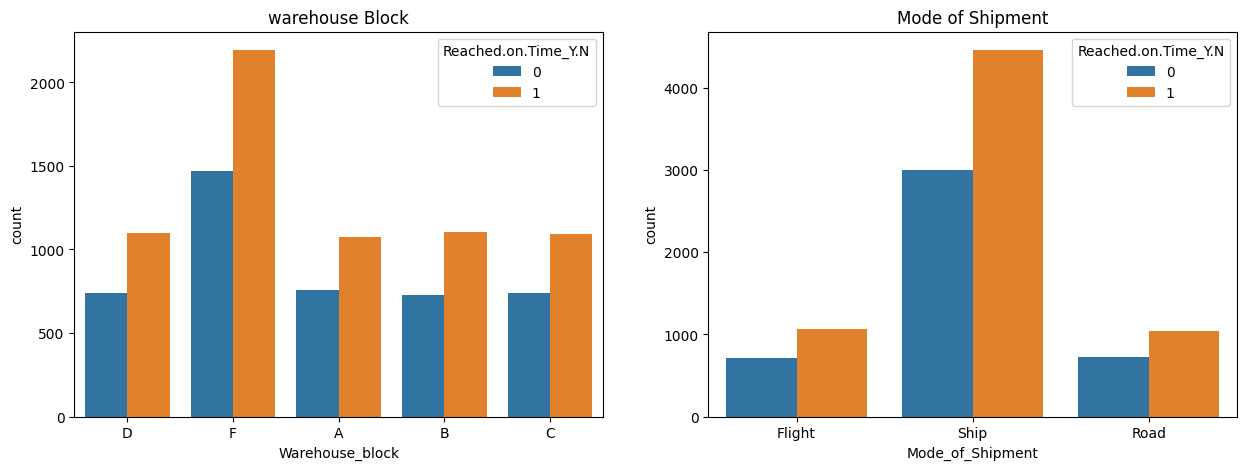

In [16]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.countplot(x = 'Warehouse_block', data = df, ax=ax[0], hue = 'Reached.on.Time_Y.N').set_title('warehouse Block')
sns.countplot(x = 'Mode_of_Shipment', data = df, ax=ax[1], hue = 'Reached.on.Time_Y.N').set_title('Mode of Shipment')

These graphs explain the relationship between the logistic and timely delivery of the product.Since most of the product are shipped from warehouse F,I assumed that warehouse closed seaport, and most of the products are shipped via ship. In both the graphs, the diffrence between thee number of product deliver on time and not deliverd on time is constant across all the warehouse blocks and mode of shipment. this means that the logistic and most of shipment has no impact on the product delivery.

# customer Experience and Product delivery

Text(0.5, 1.0, 'Discount Offered')

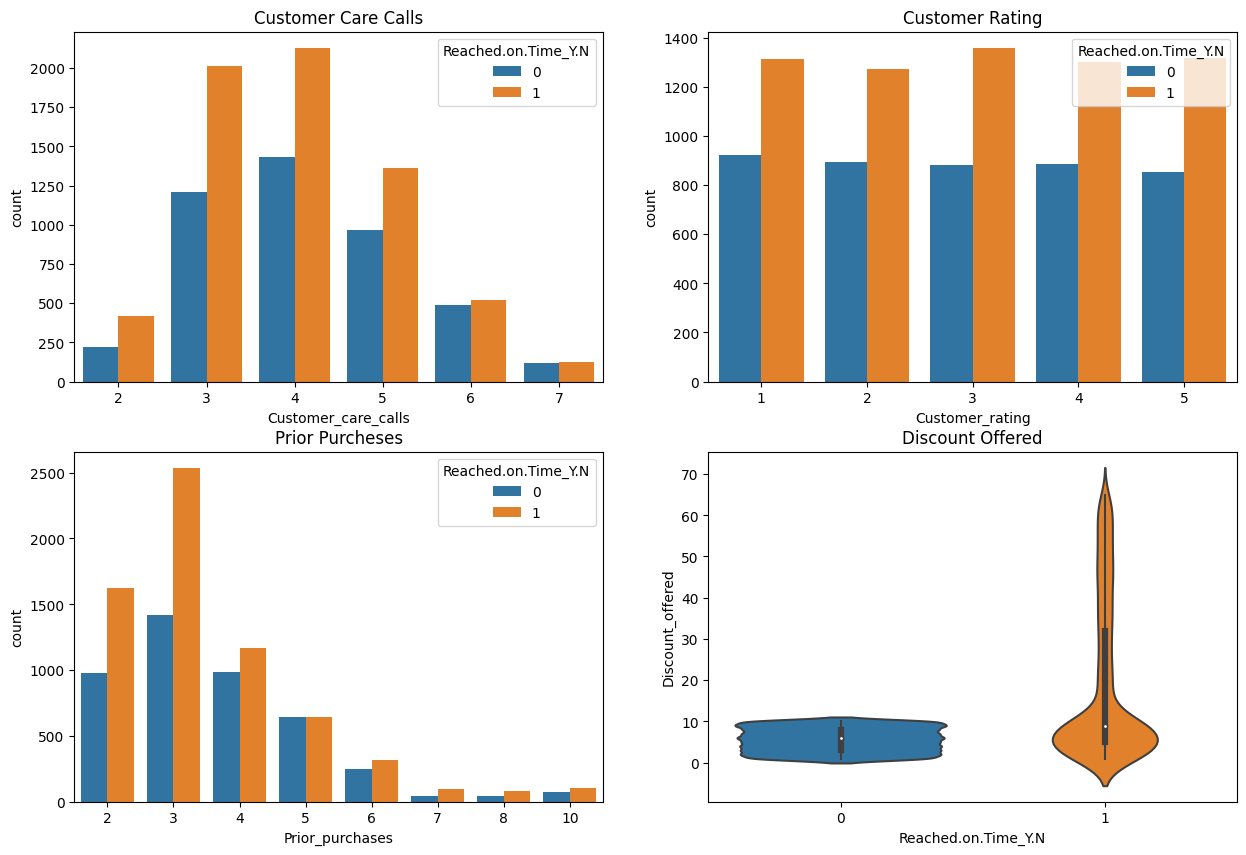

In [17]:
fig, ax = plt.subplots(2,2,figsize=(15,10))
sns.countplot(x = 'Customer_care_calls', data = df,ax=ax[0,0],hue = 'Reached.on.Time_Y.N').set_title('Customer Care Calls')
sns.countplot(x = 'Customer_rating', data = df, ax=ax[0,1],hue = 'Reached.on.Time_Y.N').set_title('Customer Rating')
sns.countplot(x = 'Prior_purchases', data = df, ax=ax[1,0],hue = 'Reached.on.Time_Y.N').set_title('Prior Purcheses')
sns.violinplot(x = 'Reached.on.Time_Y.N', y = 'Discount_offered',data = df,ax=ax[1,1]).set_title('Discount Offered')

it is important to understsndd the customer experience and respond to services provide by the E-Coommerce company. Thje above graphs the relationship between customer exprience and product delivery. The first graph is about the customer caaree calls and product decreases with the delay in product delivery the customer gets anxious about the product and calls the customer care. The second ghraph is about the customer rating and product delivery, where we can see that customer who rating have higher count of products delivery on time.

The thierdd graph is about the customer's prior purchase,which also shows thst  custmors who have higher count of prooducts delivered on time and this is reason that they are purchasing agian from the company.The forth graph is about the reason that they are purchasing agin the company.The forth graph is about the discount offered on the product delivery, ehre we can see that discount that have 0-10% discount have higher count of products delivered late, whereas products that have discount more than 10% have higher count of products delivered on time.

# Data preprocesssing 2

Label Encoding the Categsrical variables

In [18]:
from sklearn.preprocessing import LabelEncoder

#Label enciding object
le = LabelEncoder()

#columns for label encoding
cols = ['Warehouse_block','Mode_of_Shipment','Product_importance', 'Gender']

#Label encoding
for i in cols:
    le.fit(df[i])
    df[i] = le.transform(df[i])
    print(i, df[i].unique())

Warehouse_block [3 4 0 1 2]
Mode_of_Shipment [0 2 1]
Product_importance [1 2 0]
Gender [0 1]


# Correlation Matrix Heatmap

<Axes: >

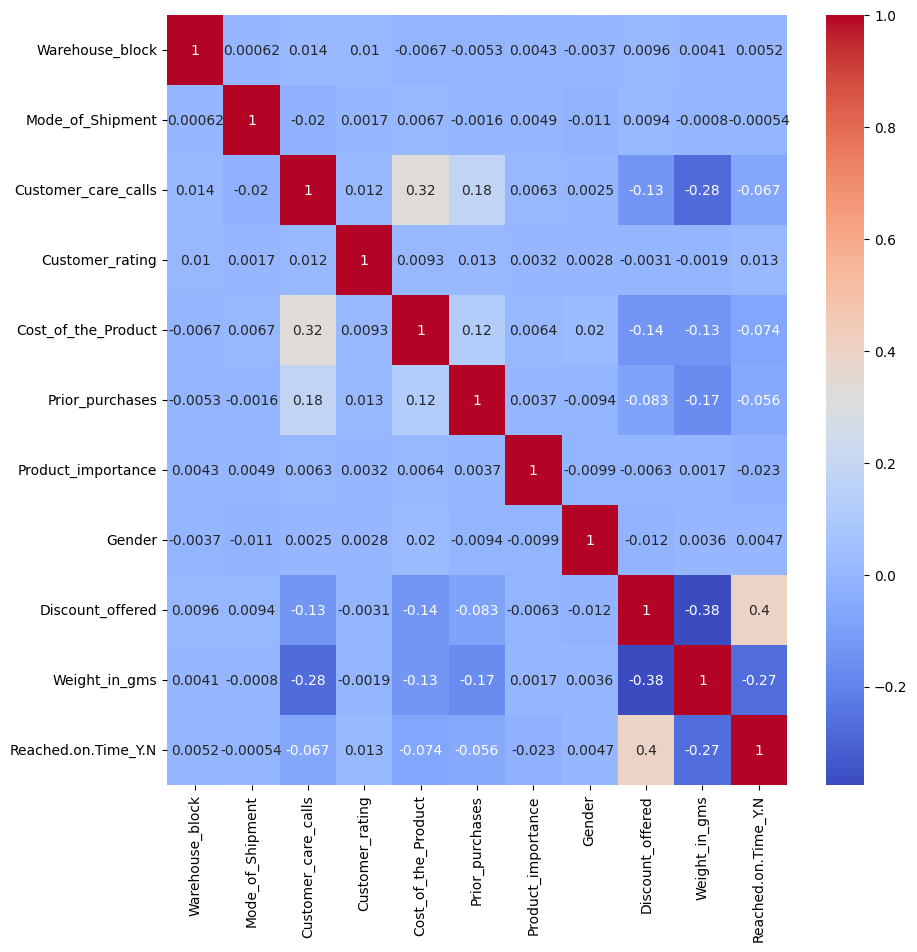

In [19]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In the corrlation matrix heatmap, we can see that another is positive corrlation between cost of product and number of custmer care calls.

<Axes: xlabel='Customer_care_calls', ylabel='Cost_of_the_Product'>

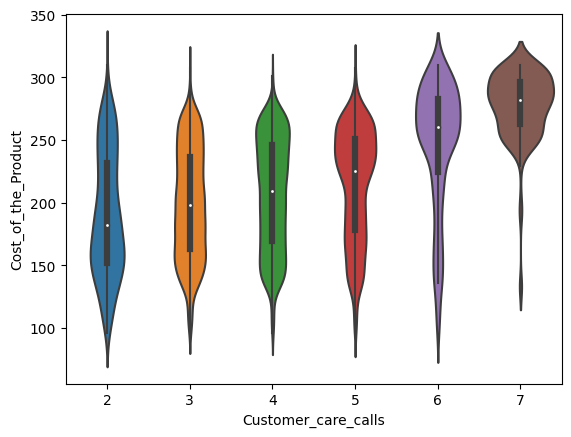

In [20]:
sns.violinplot(x = 'Customer_care_calls', y = 'Cost_of_the_Product', data = df)

It is clear that customer are more concern regarding the deliry of the product when the cost of the product is high. This is the reson that htey call the customer care to know the stetus of product. So,it is important to make sure the delivery of product is on time when the product is high.

# Trian Test Split

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Reached.on.Time_Y.N', axis=1), df['Reached.on.Time_Y.N'], test_size=0.2, random_state=0)

# Model Building

I will be using the following models to predict the product delivery
.Random Forest Classifier
.decision tree Classifier
.Logistic regression
.K Nearest Neighbors

In [22]:
from sklearn.ensemble import RandomForestClassifier

#Random Forest Classifier Object
rfc = RandomForestClassifier()

# Random forest Classifier

In [24]:
from sklearn.tree import DecisionTreeClassifier

#Decision Tree Classifier Object
dtc = DecisionTreeClassifier()

In [25]:
#Using GridSearchCV for hyperparameter tuning
from sklearn.model_selection import GridSearchCV
#Parameter grid
param_grid = {
    'max_depth': [2,4,6,8],
    'min_samples_leaf': [2,4,6,8],
    'min_samples_split': [2,4,6,8],
    'criterion': ['gini', 'entropy'],
    'random_state': [0,42]}

#GridSearchCV object
grid = GridSearchCV(estimator=dtc, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

#Fitting the model
grid.fit(X_train, y_train)

#Best parameters
print('Best parameters: ', grid.best_params_)

Fitting 5 folds for each of 256 candidates, totalling 1280 fits
Best parameters:  {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 6, 'min_samples_split': 2, 'random_state': 0}


In [41]:
#Decision Tree Classifier Object
dtc = DecisionTreeClassifier(criterion='gini', max_depth=6, min_samples_leaf=6, min_samples_split=2, random_state=0, class_weight='balanced')

#Fitting the model
dtc.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=6, min_samples_leaf=6,
                       random_state=0)

In [42]:
#Training accuracy
print('Training accuracy: ', dtc.score(X_train, y_train))

Training accuracy:  0.6913285600636436


In [43]:
#predicting the test set results
dtc_pred = dtc.predict(X_test)

logistic regression

In [44]:
from sklearn.linear_model import LogisticRegression

#Logistic Regression Object
lr = LogisticRegression()

In [45]:
#fitting the model
lr.fit(X_train, y_train)

LogisticRegression()

In [46]:
#Training accuracy
lr.score(X_train, y_train)

0.6356404136833731

In [47]:
#predicting the test set results
lr_pred = lr.predict(X_test)

K Nearest Neighbors

In [48]:
from sklearn.neighbors import KNeighborsClassifier

#KNN Classifier Object
knn = KNeighborsClassifier()

In [49]:
#fitting the model
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [50]:
#training accuracy
knn.score(X_train, y_train)

0.7782702579838618

In [51]:
#predicting the test set results
knn_pred = knn.predict(X_test)

# Model Evalution

In [52]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error, r2_score, mean_squared_error

Text(0.5, 1.0, 'KNN Classifier')

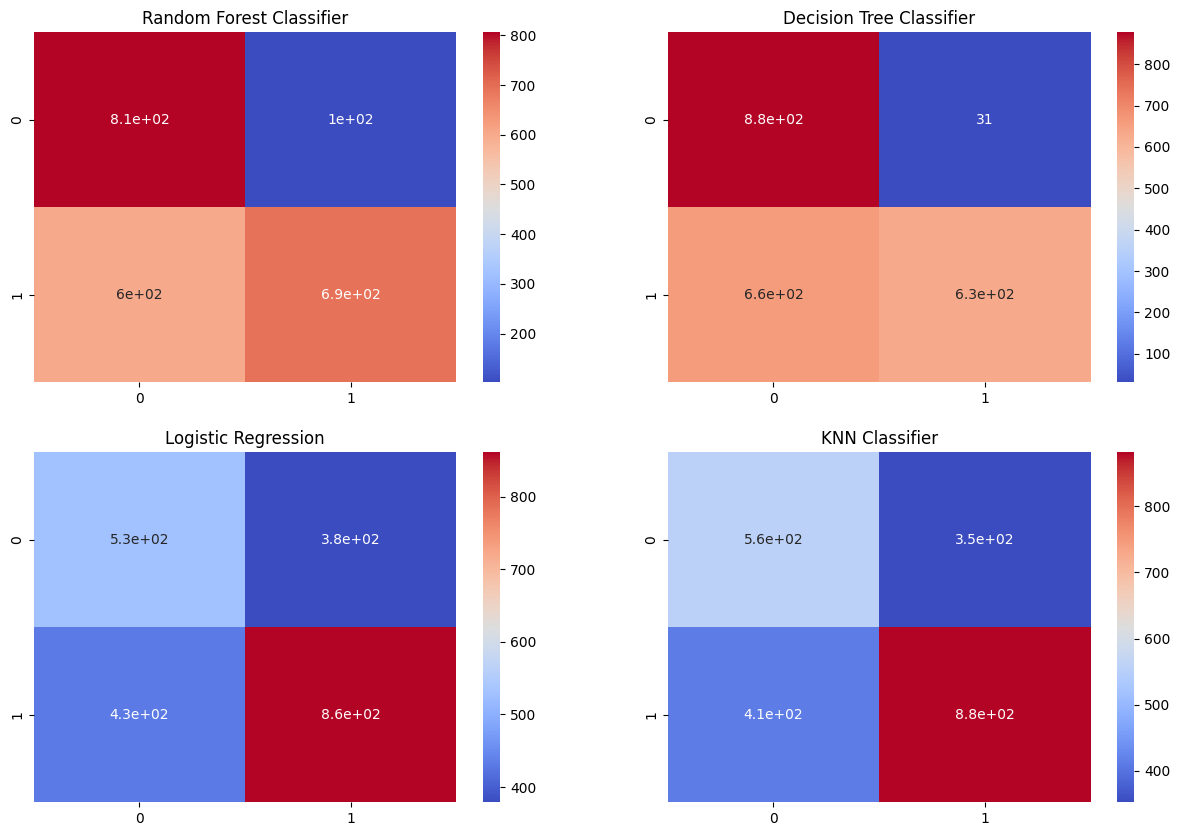

In [53]:
fig, ax = plt.subplots(2,2,figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, rfc_pred), annot=True, cmap='coolwarm', ax=ax[0,0]).set_title('Random Forest Classifier')
sns.heatmap(confusion_matrix(y_test, dtc_pred), annot=True, cmap='coolwarm', ax=ax[0,1]).set_title('Decision Tree Classifier')
sns.heatmap(confusion_matrix(y_test, lr_pred), annot=True, cmap='coolwarm', ax=ax[1,0]).set_title('Logistic Regression')
sns.heatmap(confusion_matrix(y_test, knn_pred), annot=True, cmap='coolwarm', ax=ax[1,1]).set_title('KNN Classifier')

In [54]:
#classification report
print('Random Forest Classifier: \n', classification_report(y_test, rfc_pred))
print('Decision Tree Classifier: \n', classification_report(y_test, dtc_pred))
print('Logistic Regression: \n', classification_report(y_test, lr_pred))
print('KNN Classifier: \n', classification_report(y_test, knn_pred))

Random Forest Classifier: 
               precision    recall  f1-score   support

           0       0.57      0.89      0.70       908
           1       0.87      0.54      0.66      1292

    accuracy                           0.68      2200
   macro avg       0.72      0.71      0.68      2200
weighted avg       0.75      0.68      0.68      2200

Decision Tree Classifier: 
               precision    recall  f1-score   support

           0       0.57      0.97      0.72       908
           1       0.95      0.49      0.65      1292

    accuracy                           0.69      2200
   macro avg       0.76      0.73      0.68      2200
weighted avg       0.80      0.69      0.68      2200

Logistic Regression: 
               precision    recall  f1-score   support

           0       0.55      0.58      0.57       908
           1       0.69      0.67      0.68      1292

    accuracy                           0.63      2200
   macro avg       0.62      0.62      0.62      

# MODEL COMPARISON

Text(0, 0.5, 'Accuracy')

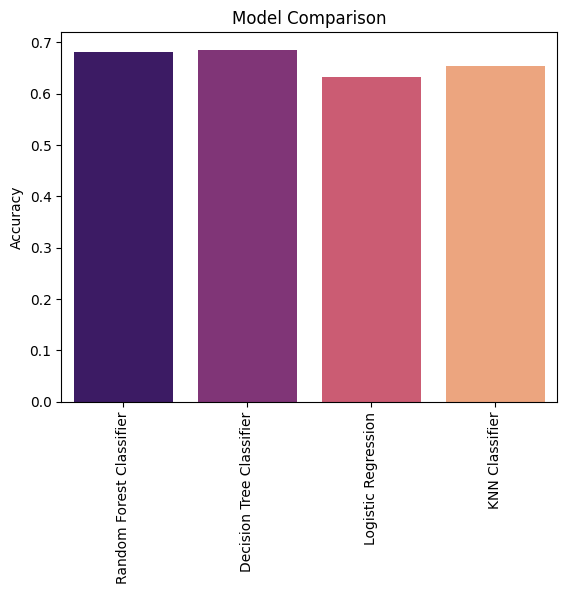

In [55]:
models = ['Random Forest Classifier', 'Decision Tree Classifier', 'Logistic Regression', 'KNN Classifier']
accuracy = [accuracy_score(y_test, rfc_pred), accuracy_score(y_test, dtc_pred), accuracy_score(y_test, lr_pred), accuracy_score(y_test, knn_pred)]
sns.barplot(x=models, y=accuracy, palette='magma').set_title('Model Comparison')
plt.xticks(rotation=90)
plt.ylabel('Accuracy')

# Conclusion

The aim of the project was to predict whether the product from an e-commerce
company will reach on time or not. This project also analyzes various factors that affect
the delivery of the product as well as studies the customer behavior. From the
exploratory data analysis, I found that the product weight and cost has an impact on the
product delivery. Where product that weighs between 2500 - 3500 grams and having
cost less than 250 dollars had higher rate of being delivered on time. Most of the
products were shipped from warehouse F though ship, so it is quite possible that
warehouse F is close to a seaport.
The customer's behaviour also help in predicting the timely delivery of the product. The
more the customer calls, higher the chances the product delivery is delayed.
Interestingly, the customers who have done more prior purchases have higher count of
products delivered on time and this is the reason that they are purchasing again from
the company. The products that have 0-10% discount have higher count of products
delivered late, whereas products that have discount more than 10% have higher count of
products delivered on time Coming to the machine learning models, the decision tree classifier as the highest
accuracy among the other models, with accuracy of 69%. The random forest classifier
and logistic regression had accuracy of 68% and 67% respectively. The K Nearest
Neighbors had the lowest accuracy of 65%